In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/

/content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터


In [3]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#파일 경로 일원화 
path = '/content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
path_info = '/content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/VEEM 대상자 정보.csv'

In [5]:
#eyerpt 
import pandas as pd
import numpy as np
import os
import natsort
from scipy.spatial import distance
from datetime import datetime

file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('eyerpt.csv')] ## 파일명 끝이 .csv인 경우

file_list_py = natsort.natsorted(file_list_py) # 번호 순대로 파일 정렬
file_list_py

#rpt 
import os 
import pandas as pd 
from scipy.spatial import distance
from datetime import datetime

files = os.listdir(path)

rpt_files = []
for i in files:
  if '_rpt.csv' in i:
    rpt_files.append(i)

rpt_files.sort()
print(rpt_files)

['02_rpt.csv', '03_rpt.csv', '04_rpt.csv', '06_rpt.csv', '07_rpt.csv', '08_rpt.csv', '09_rpt.csv', '10_rpt.csv', '11_rpt.csv', '12_rpt.csv', '13_rpt.csv', '14_rpt.csv', '15_rpt.csv', '16_rpt.csv', '17_rpt.csv', '18_rpt.csv', '19_rpt.csv', '20_rpt.csv', '21_rpt.csv', '22_rpt.csv', '23_rpt.csv', '24_rpt.csv', '25_rpt.csv', '27_rpt.csv', '28_rpt.csv', '29_rpt.csv', '30_rpt.csv', '31_rpt.csv', '32_rpt.csv', '33_rpt.csv', '34_rpt.csv', '35_rpt.csv', '36_rpt.csv', '37_rpt.csv', '38_rpt.csv', '39_rpt.csv', '40_rpt.csv']


In [6]:
cnt = 0
final_data_list = []
final_data_1 = pd.DataFrame(columns = ['ID', 
                                       '버튼을 바라본 누적횟수', 
                                       '버튼을 바라본 누적 시간', 
                                       'error rate'])

for i in file_list_py:
    name = i
    name = name.split("_")[0]

    data_2 = pd.read_csv("{}/{}".format(path,i))
    df_2 = pd.DataFrame(data_2)
    df_2 = df_2.drop(['time', 'beforeOBJ', 'presentOBJ', 'Obeject_name'], axis = 'columns', inplace = False) # 필요없는 열 삭제
      # 버튼을 바라본 누적 횟수 + 누적 기간 list 정의
    max = [0 for i in range(17)]
# start
    max[0] = df_2['start_count'].max()
    max[1] = df_2['start'].max() 
# 1 단계
    max[2] = df_2['instore_count'].max() + df_2['takeout_count'].max()
    max[3] = df_2['instore'].max() + df_2['takeout'].max()
# 2 단계
    max[4] = df_2['ham1_count'].max() + df_2['ham2_count'].max() + df_2['ham3_count'].max() + df_2['ham4_count'].max() + df_2['ham5_count'].max() + df_2['ham6_count'].max() + df_2['ham7_count'].max() + df_2['ham8_count'].max()
    max[5] = df_2['ham1'].max() + df_2['ham2'].max() + df_2['ham3'].max() + df_2['ham4'].max() + df_2['ham5'].max() + df_2['ham6'].max() + df_2['ham7'].max() + df_2['ham8'].max()
# 3 단계
    max[6] = df_2['side1_count'].max() + df_2['side2_count'].max() +df_2['side3_count'].max() +df_2['side4_count'].max() +df_2['side5_count'].max() +df_2['side6_count'].max() +df_2['side7_count'].max() +df_2['side8_count'].max()
    max[7] = df_2['side1'].max() +df_2['side2'].max() +df_2['side3'].max() +df_2['side4'].max() +df_2['side5'].max() +df_2['side6'].max() +df_2['side7'].max() +df_2['side8'].max() 
# 4 단계
    max[8] = df_2['bev1_count'].max() +df_2['bev2_count'].max() +df_2['bev3_count'].max() +df_2['bev4_count'].max() +df_2['bev5_count'].max() +df_2['bev6_count'].max() +df_2['bev7_count'].max() +df_2['bev8_count'].max()
    max[9] = df_2['bev1'].max() + df_2['bev2'].max() + df_2['bev3'].max() + df_2['bev4'].max() + df_2['bev5'].max() + df_2['bev6'].max() + df_2['bev7'].max() + df_2['bev8'].max()
# 5 단계
    max[10] = df_2['card_count'].max() + df_2['mobile_count'].max()
    max[11] = df_2['card'].max() + df_2['mobile'].max()
# 6 단계
    max[12] = df_2['count_1'].max() + df_2['count_2'].max() + df_2['count_3'].max() + df_2['count_4'].max() + df_2['count_5'].max() + df_2['count_6'].max() + df_2['count_7'].max() + df_2['count_8'].max() + df_2['count_9'].max() + df_2['delete_count'].max() + df_2['count_0'].max() + df_2['ok_count'].max()
    max[13] = df_2['n1'].max() + df_2['n2'].max() + df_2['n3'].max() + df_2['n4'].max() + df_2['n5'].max() + df_2['n6'].max() + df_2['n7'].max() + df_2['n8'].max() + df_2['n9'].max() + df_2['delete'].max() + df_2['n0'].max() + df_2['ok'].max() 
# back and error
    max[14] = df_2['back_count'].max()
    max[15] = df_2['back'].max()
    max[16] = df_2['error'].max()


# 버튼을 바라본 횟수 누적 합/ 누적 시간 정의
    total_count = 0
    total_time = 0

# 0~7단계 까지 모든 버튼을 바라본 누적 합
    for i in range(0,15,2):
       total_count += max[i]

# 0~7단계 까지 모든 버튼을 바라본 누적 시간 합
    for i in range(1,16,2):
       total_time += max[i]

# error가 일어난 횟수 --> back_count를 고려를 해야하는데 이전 화면 버튼을 보지 않아도 error가 줄어드는 현상이 발생했다.
# 시선 추적 데이터로 error를 추정하는 건 의미가 없다고 생각. 버튼을 보기만 하고 클릭을 하지 않았을 수 있기에
# 어떤 버튼이 
       error = max[16]

    #print("실험자 VEEM Info")
    #print("버튼을 바라본 누적 횟수 합: {0}".format(total_count))
    #print("버튼을 바라본 누적 시간 합: {0}{1} ".format(total_time, 's'))
    #print("총 error 횟수: ", error)
    #print("----------------------------------------------")
   

    
    
    
    final_data_list = [name, total_count, total_time, error]
    
    final_data_1.loc[cnt] = final_data_list

    cnt+=1

print(final_data_1)
    



    ID 버튼을 바라본 누적횟수  버튼을 바라본 누적 시간 error rate
0   02          302      62.466707          4
1   03           77      14.344449          3
2   04           82      12.433321          4
3   06          181      30.100010          6
4   07          180      47.433332          3
5   08           61      18.044459          0
6   09           29      43.622225          0
7   10           61      86.933329          6
8   11          162     288.866661          9
9   12           93     122.266665          9
10  13           26      43.622224          0
11  14          112     118.500001          5
12  15           27      26.255555          1
13  16           46      45.977780          1
14  17           57      34.411112          0
15  18           58      45.933334          2
16  19           78      45.511112          2
17  20           62      33.366700          5
18  21          327     170.577775          5
19  22           81      89.400003          4
20  23          148      33.433332

Euclidean Distance로 좌표간 총 거리 구하기


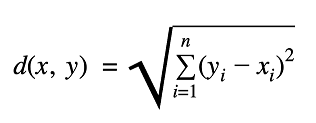

In [7]:
cnt = 0
final_data_list = []
final_data_2 = pd.DataFrame(columns = ['시선 이동거리(m)', 
                                       '시선 이동 시간(s)', 
                                       '시선 평균 이동 속력(m/s)', 
                                       '초당 눈 깜빡임 횟수(per/s)'])
for i in file_list_py:
    data_2 = pd.read_csv("{}/{}".format(path,i))
    df_2 = pd.DataFrame(data_2)
    df_2 = df_2.drop(['time', 'beforeOBJ', 'presentOBJ', 'Obeject_name'], axis = 'columns', inplace = False) # 필요없는 열 삭제
########## 총 이동 거리 ##########
# Panel_X, Panel_Y Unit 단위 반환

    Panel_X = df_2['Panel_X'] * 1.368508
    Panel_Y = df_2['Panel_Y'] * 1.07012

    data1 = {'x' : Panel_X, 'y': Panel_Y}

# dataframe를 numpy로 변환
    df_coord = pd.DataFrame(data1)
    coord = np.array(df_coord)

    eye_total_distance = 0 # 총 시선 이동거리 정의
    ED = 0 # 각 좌표마다 euclidean distance 정의

# 행이 짝수? 홀수?
    for i in range(0,len(df_2)-1):
   
      ED = distance.euclidean(coord[i], coord[i+1])
      eye_total_distance += ED


########### 총 소요시간 ###########

    Panel_num = df_2['Panel_num']
    time_stamp = df_2['time stamp']

    data2 = {'Panel_num' : Panel_num, 'time stamp' : time_stamp}
    df_time = pd.DataFrame(data2)

    end = df_time[df_time['Panel_num'] == 8].index
    df_time.drop(end, inplace = True)
    df_time

    time = df_time.loc[:,['time stamp']]

    last_time = time.iloc[int(len(time))-1]
    first_time = time.iloc[0]

    last_time = str(last_time).split(" ")[-4].split("\n")[0]
    first_time = str(first_time).split(" ")[-4].split("\n")[0]

    last_time = datetime.strptime(last_time, "%H:%M:%S")
    first_time = datetime.strptime(first_time,"%H:%M:%S")

    eye_time_interval = last_time - first_time
    eye_time_interval = eye_time_interval.total_seconds()



########## 평균 속력 ###########
    v = eye_total_distance / eye_time_interval
    



########## blink rate ##########
    blink = 0 # 눈 깜빡임 횟수
    threshold = 0.35 # eyeopennes 임계치
    blink_data = df_2[((df_2['eyeOpennes_R'] <= threshold) & (df_2['eyeOpennes_L'] <= threshold)) & ((df_2['pupilDia_L'] == -1) & (df_2['pupilDia_R'] == -1))]

    total_blink = len(blink_data) # 총 눈 깜빡임 횟수

    blink_rate = total_blink / eye_time_interval


############ 출력 ############
    #print("실험자 VEEM Info")
    #print("총 시선 이동 거리: {0} {1}".format(eye_total_distance, 'm'))
    #print("총 시선 이동 시간: {0} {1}".format(eye_time_interval, "s"))
    #print("시선 평균 속력: {0} {1}".format(v, "m/s"))
    #print("---------------------------------------------")



    final_data_list = [eye_total_distance, eye_time_interval, v, blink_rate]

    final_data_2.loc[cnt] = final_data_list

    cnt+=1

print(final_data_2)



    시선 이동거리(m)  시선 이동 시간(s)  시선 평균 이동 속력(m/s)  초당 눈 깜빡임 횟수(per/s)
0   138.649116        137.0          1.012037            3.751825
1   123.947543         35.0          3.541358            5.057143
2    26.658080         24.0          1.110753            2.333333
3    89.810030        145.0          0.619380            5.910345
4    67.086007         81.0          0.828222            0.543210
5    29.128155         37.0          0.787247            0.162162
6     7.309749         43.0          0.169994            0.395349
7    16.688551         85.0          0.196336            0.635294
8    45.009061        288.0          0.156281            1.489583
9    22.558884        124.0          0.181926            6.056452
10    8.883409         42.0          0.211510            0.285714
11   26.462210        124.0          0.213405            1.298387
12    6.703691         26.0          0.257834            0.961538
13   13.617055         47.0          0.289725            1.000000
14   12.16

In [8]:
#rpt 코드 
cnt = 0 
final_data_list = []
final_data = pd.DataFrame(columns=['ID', '총 손이동시간', '총 손이동거리','총 손속력','0걸린시간', '1걸린시간', '2걸린시간', '3걸린시간', '4걸린시간', '5걸린시간', '6걸린시간','7걸린시간', '8걸린시간'])

for i in rpt_files:
  name = i
  name = name.split("_")[0]
     
  data = pd.read_csv("{}/{}".format(path,i))
  df = pd.DataFrame(data)
  hand_p_x = df.loc[:,['hand_x_m']] * 1.368508
  hand_p_y = df.loc[:,['hand_y_m']] * 1.07012
  hand_p_z = df.loc[:,['hand_z_m']] * 1.0085215
  df.loc[:,'hand_x_m'] = hand_p_x
  df.loc[:,'hand_y_m'] = hand_p_y
  df.loc[:,'hand_z_m'] = hand_p_z

  #좌표 계산 
  hand_p = df.loc[:,['hand_x_m' ,'hand_y_m','hand_z_m']]

  #총 이동시간 계산 
  time = df.loc[:,['time stamp']]
  last_time = time.iloc[int(len(time))-1]
  first_time = time.iloc[0]

  last_time = str(last_time).split(" ")[-4].split("\n")[0]
  first_time = str(first_time).split(" ")[-4].split("\n")[0]

  last_time = datetime.strptime(last_time, "%H:%M:%S")
  first_time = datetime.strptime(first_time,"%H:%M:%S")

  time_interval = last_time - first_time
  time_interval = time_interval.total_seconds()

  #총 이동거리 계산 
  hand_d_sum = 0
  for i in range(len(hand_p)):
    hand_d = distance.euclidean(hand_p.iloc[i], hand_p.iloc[i+1])
    hand_d_sum += hand_d
    if i == int(len(hand_p)) - 2:
      break


  #속도 계산 
  v = hand_d_sum / time_interval

  cnt_0 = 0
  cnt_1 = 0
  cnt_2 = 0
  cnt_3 = 0
  cnt_4 = 0
  cnt_5 = 0
  cnt_6 = 0
  cnt_7 = 0
  cnt_8 = 0 

  # 행 수 구하기 
  for j in df['panel_num'].to_list():
    if j == 0:
      cnt_0 += 1
    if j == 1:
      cnt_1 += 1
    if j == 2: 
      cnt_2 += 1
    if j == 3: 
      cnt_3 += 1
    if j == 4: 
      cnt_4 += 1
    if j == 5: 
      cnt_5 += 1
    if j == 6: 
      cnt_6 += 1
    if j == 7: 
      cnt_7 += 1
    if j == 8: 
      cnt_8 += 1

  cnt_0 = 1 + cnt_0
  cnt_1 = cnt_0 + cnt_1
  cnt_2 = cnt_1 + cnt_2
  cnt_3 = cnt_2 + cnt_3
  cnt_4 = cnt_3 + cnt_4
  cnt_5 = cnt_4 + cnt_5
  cnt_6 = cnt_5 + cnt_6
  cnt_7 = cnt_6 + cnt_7
  cnt_8 = cnt_7 + cnt_8-2


  time = df['time stamp']

  time_start = time.iloc[0]
  time_0 = time.iloc[cnt_0]
  time_1 = time.iloc[cnt_1]
  time_2 = time.iloc[cnt_2]
  time_3 = time.iloc[cnt_3]
  time_4 = time.iloc[cnt_4]
  time_5 = time.iloc[cnt_5]
  time_6 = time.iloc[cnt_6]
  time_7 = time.iloc[cnt_7]
  time_8 = time.iloc[cnt_8]

  time_start = str(time_start).split(" ")[2].split("\n")[0]
  time_0 = str(time_0).split(" ")[2].split("\n")[0]
  time_1 = str(time_1).split(" ")[2].split("\n")[0]
  time_2 = str(time_2).split(" ")[2].split("\n")[0]
  time_3 = str(time_3).split(" ")[2].split("\n")[0]
  time_4 = str(time_4).split(" ")[2].split("\n")[0]
  time_5 = str(time_5).split(" ")[2].split("\n")[0]
  time_6 = str(time_6).split(" ")[2].split("\n")[0]
  time_7 = str(time_7).split(" ")[2].split("\n")[0]
  time_8 = str(time_8).split(" ")[2].split("\n")[0]

  time_start = datetime.strptime(time_start, "%H:%M:%S")
  time_0 = datetime.strptime(time_0, "%H:%M:%S")
  time_1 = datetime.strptime(time_1, "%H:%M:%S")
  time_2 = datetime.strptime(time_2, "%H:%M:%S")
  time_3 = datetime.strptime(time_3, "%H:%M:%S")
  time_4 = datetime.strptime(time_4, "%H:%M:%S")
  time_5 = datetime.strptime(time_5, "%H:%M:%S")
  time_6 = datetime.strptime(time_6, "%H:%M:%S")
  time_7 = datetime.strptime(time_7, "%H:%M:%S")
  time_8 = datetime.strptime(time_8, "%H:%M:%S")

  time_interval_0 = time_0 - time_start
  time_interval_1 = time_1 - time_0
  time_interval_2 = time_2 - time_1
  time_interval_3 = time_3 - time_2
  time_interval_4 = time_4 - time_3
  time_interval_5 = time_5 - time_4
  time_interval_6 = time_6 - time_5
  time_interval_7 = time_7 - time_6
  time_interval_8 = time_8 - time_7

  time_interval_0 = time_interval_0.total_seconds()
  time_interval_1 = time_interval_1.total_seconds()
  time_interval_2 = time_interval_2.total_seconds()
  time_interval_3 = time_interval_3.total_seconds()
  time_interval_4 = time_interval_4.total_seconds()
  time_interval_5 = time_interval_5.total_seconds()
  time_interval_6 = time_interval_6.total_seconds()
  time_interval_7 = time_interval_7.total_seconds()
  time_interval_8 = time_interval_8.total_seconds()

  

  final_data_list = [name, time_interval, hand_d_sum, v, time_interval_0, time_interval_1, time_interval_2, time_interval_3,time_interval_4, time_interval_5, time_interval_6, time_interval_7, time_interval_8]


  final_data.loc[cnt] = final_data_list

  cnt += 1

final_data = final_data.iloc[:,1:]
final_data


,총 손이동시간,총 손이동거리,총 손속력,0걸린시간,1걸린시간,2걸린시간,3걸린시간,4걸린시간,5걸린시간,6걸린시간,7걸린시간,8걸린시간
0,154.0,31.628292,0.205379,74.0,3.0,4.0,5.0,3.0,11.0,0.0,46.0,8.0
1,84.0,15.430372,0.183695,4.0,2.0,4.0,8.0,4.0,3.0,0.0,11.0,48.0
2,29.0,8.422684,0.290437,3.0,1.0,3.0,5.0,2.0,1.0,0.0,10.0,4.0
3,148.0,16.473255,0.111306,15.0,9.0,10.0,25.0,12.0,11.0,0.0,64.0,2.0
4,86.0,11.936364,0.138795,17.0,4.0,8.0,6.0,17.0,2.0,0.0,29.0,3.0
5,42.0,12.049353,0.286889,5.0,6.0,6.0,5.0,4.0,3.0,0.0,9.0,4.0
6,49.0,9.136534,0.186460,7.0,4.0,5.0,10.0,3.0,3.0,0.0,13.0,4.0
7,92.0,17.494289,0.190155,15.0,6.0,10.0,18.0,5.0,4.0,0.0,31.0,3.0
8,295.0,22.843444,0.077435,32.0,44.0,55.0,26.0,0.0,34.0,0.0,100.0,4.0
9,128.0,17.343733,0.135498,4.0,7.0,22.0,18.0,5.0,8.0,0.0,61.0,3.0


In [9]:
#VEEM 대상자 정보 
p_info = pd.read_csv("{}".format(path_info))
p_info = pd.DataFrame(p_info)
p_info['성별'] = p_info['성별'].replace({'남성':0, '여성':1})
p_info = p_info[['성별', '나이', '교육연한', '집단']]

In [10]:
############ DataFrame 만들기 ############
final_data_sum = pd.DataFrame()
final_data_sum = pd.concat([final_data_1, final_data_2,final_data, p_info], axis = 1)
final_data_sum

,ID,버튼을 바라본 누적횟수,버튼을 바라본 누적 시간,error rate,시선 이동거리(m),시선 이동 시간(s),시선 평균 이동 속력(m/s),초당 눈 깜빡임 횟수(per/s),총 손이동시간,총 손이동거리,...,3걸린시간,4걸린시간,5걸린시간,6걸린시간,7걸린시간,8걸린시간,성별,나이,교육연한,집단
0,02,302,62.466707,4,138.649116,137.0,1.012037,3.751825,154.0,31.628292,...,5.0,3.0,11.0,0.0,46.0,8.0,1,71,16,HC
1,03,77,14.344449,3,123.947543,35.0,3.541358,5.057143,84.0,15.430372,...,8.0,4.0,3.0,0.0,11.0,48.0,0,73,16,HC
2,04,82,12.433321,4,26.658080,24.0,1.110753,2.333333,29.0,8.422684,...,5.0,2.0,1.0,0.0,10.0,4.0,1,59,12,MCI
3,06,181,30.100010,6,89.810030,145.0,0.619380,5.910345,148.0,16.473255,...,25.0,12.0,11.0,0.0,64.0,2.0,0,83,14,MCI
4,07,180,47.433332,3,67.086007,81.0,0.828222,0.543210,86.0,11.936364,...,6.0,17.0,2.0,0.0,29.0,3.0,1,67,15,MCI
5,08,61,18.044459,0,29.128155,37.0,0.787247,0.162162,42.0,12.049353,...,5.0,4.0,3.0,0.0,9.0,4.0,0,60,16,HC
6,09,29,43.622225,0,7.309749,43.0,0.169994,0.395349,49.0,9.136534,...,10.0,3.0,3.0,0.0,13.0,4.0,0,79,16,HC
7,10,61,86.933329,6,16.688551,85.0,0.196336,0.635294,92.0,17.494289,...,18.0,5.0,4.0,0.0,31.0,3.0,0,69,12,MCI
8,11,162,288.866661,9,45.009061,288.0,0.156281,1.489583,295.0,22.843444,...,26.0,0.0,34.0,0.0,100.0,4.0,0,86,12,MCI
9,12,93,122.266665,9,22.558884,124.0,0.181926,6.056452,128.0,17.343733,...,18.0,5.0,8.0,0.0,61.0,3.0,0,57,9,MCI


In [11]:

############ csv 파일로 저장 #############

final_data_sum.to_csv('/content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/최종데이터_ver3.csv', index = False, encoding="utf-8-sig") #csv파일로 생성

In [12]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [13]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm
import datetime
from datetime import date
import random

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import mglearn
from matplotlib import font_manager,rc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [14]:
final_dataset = pd.read_csv("/content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/최종데이터_ver3.csv")
SNSB_dataset = pd.read_csv("/content/drive/MyDrive/딥러닝 팀 프로젝트 배포 VEEM 데이터/딥러닝 팀 프로젝트 배포 VEEM 데이터/VEEM SNSB 데이터.csv")

In [15]:
SNSB_dataset

,번호,성명 코드,집단,DST_F+B,S-K-BNT,RCFT_copyscore,SVLT_delayedrecall,K-TMT-E_B,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,2.0,NSU1,HC,13.0,11.0,35.0,11.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,CSR1,HC,10.0,15.0,30.0,5.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,KMO1,MCI,4.0,11.0,35.0,1.0,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,LCH1,MCI,5.0,8.0,18.5,0.0,300.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,LYH1,MCI,12.0,10.0,36.0,7.0,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
SNSB_dataset_slice = SNSB_dataset.iloc[:,[1,2,3,4,5,6,7]]

idx = []
for i in range(0, 37):
    idx.append(i)
SNSB_dataset_real = SNSB_dataset_slice.iloc[idx]

In [17]:
SNSB_dataset_real.head()

,성명 코드,집단,DST_F+B,S-K-BNT,RCFT_copyscore,SVLT_delayedrecall,K-TMT-E_B
0,NSU1,HC,13.0,11.0,35.0,11.0,16.0
1,CSR1,HC,10.0,15.0,30.0,5.0,26.0
2,KMO1,MCI,4.0,11.0,35.0,1.0,50.0
3,LCH1,MCI,5.0,8.0,18.5,0.0,300.0
4,LYH1,MCI,12.0,10.0,36.0,7.0,36.0


In [19]:
y = SNSB_dataset_real['집단']
x = SNSB_dataset_real.drop(labels = '집단', axis = 1)
x = x.drop(labels = '성명 코드', axis = 1)

In [20]:
scores = x

In [21]:
final = final_dataset.drop(labels = 'ID', axis = 1)
final = final.drop(labels = '집단', axis = 1)

In [30]:
scores.head()

,DST_F+B,S-K-BNT,RCFT_copyscore,SVLT_delayedrecall,K-TMT-E_B
0,13.0,11.0,35.0,11.0,16.0
1,10.0,15.0,30.0,5.0,26.0
2,4.0,11.0,35.0,1.0,50.0
3,5.0,8.0,18.5,0.0,300.0
4,12.0,10.0,36.0,7.0,36.0


In [31]:
final.head()

,버튼을 바라본 누적횟수,버튼을 바라본 누적 시간,error rate,시선 이동거리(m),시선 이동 시간(s),시선 평균 이동 속력(m/s),초당 눈 깜빡임 횟수(per/s),총 손이동시간,총 손이동거리,총 손속력,...,2걸린시간,3걸린시간,4걸린시간,5걸린시간,6걸린시간,7걸린시간,8걸린시간,성별,나이,교육연한
0,302,62.466707,4,138.649116,137.0,1.012037,3.751825,154.0,31.628292,0.205379,...,4.0,5.0,3.0,11.0,0.0,46.0,8.0,1,71,16
1,77,14.344449,3,123.947543,35.0,3.541358,5.057143,84.0,15.430372,0.183695,...,4.0,8.0,4.0,3.0,0.0,11.0,48.0,0,73,16
2,82,12.433321,4,26.658080,24.0,1.110753,2.333333,29.0,8.422684,0.290437,...,3.0,5.0,2.0,1.0,0.0,10.0,4.0,1,59,12
3,181,30.100010,6,89.810030,145.0,0.619380,5.910345,148.0,16.473255,0.111306,...,10.0,25.0,12.0,11.0,0.0,64.0,2.0,0,83,14
4,180,47.433332,3,67.086007,81.0,0.828222,0.543210,86.0,11.936364,0.138795,...,8.0,6.0,17.0,2.0,0.0,29.0,3.0,1,67,15


In [78]:
from sklearn.preprocessing import RobustScaler

model = ensemble.RandomForestRegressor(oob_score=False, random_state=531)
scaler = RobustScaler()

grid = { "n_estimators" : [1, 2, 3, 4, 5, 6, 7],
            "max_depth" : [2, 3, 4, 6, 8, 9, 10],
            "max_features": [1, 2, 3, 4, 5, 6, 7]
            }
kfold = KFold(n_splits=len(scores))

In [82]:
pred_feature = final.drop(labels = final.columns[0], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[6], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[11], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[1], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[21], axis = 1)

X_train = pred_feature
y_train = scores

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

gs_model = GridSearchCV(model, param_grid = grid, cv = kfold, scoring='neg_mean_squared_error')
gs_model.fit(X_train_scaled, y_train)
gs_model_df = pd.DataFrame(gs_model.cv_results_)

y_train_pred = gs_model.predict(X_train_scaled)

In [83]:
print(mean_squared_error(y_train, y_train_pred))
print(gs_model.best_params_)

141.4773453295392
{'max_depth': 4, 'max_features': 6, 'n_estimators': 6}


### 주석을 지우고 new test data를 넣어주세요

In [ ]:
"""X_test = pred_feature
y_test = scores

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

gs_model = GridSearchCV(model, param_grid = grid, cv = kfold, scoring='neg_mean_squared_error')
gs_model.fit(X_test_scaled, y_test)
gs_model_df = pd.DataFrame(gs_model.cv_results_)

y_test_pred = gs_model.predict(X_test_scaled)
print(mean_squared_error(y_test, y_test_pred))
print(gs_model.best_params_)
"""

In [79]:
MSE = []
params = []
I = []

for i in range(len(final.columns)):
  if i == 0 or i == 6 or i == 11 or i == 1:
    continue
  pred_feature = final.drop(labels = final.columns[0], axis = 1)
  pred_feature = pred_feature.drop(labels = final.columns[6], axis = 1)
  pred_feature = pred_feature.drop(labels = final.columns[11], axis = 1)
  pred_feature = pred_feature.drop(labels = final.columns[1], axis = 1)
  pred_feature = pred_feature.drop(labels = final.columns[i], axis = 1)

  X_train = pred_feature
  y_train = scores

  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)

  gs_model = GridSearchCV(model, param_grid = grid, cv = kfold, scoring='neg_mean_squared_error')
  gs_model.fit(X_train_scaled, y_train)
  gs_model_df = pd.DataFrame(gs_model.cv_results_)

  y_train_pred = gs_model.predict(X_train_scaled)

  MSE.append(mean_squared_error(y_train, y_train_pred))
  params.append(gs_model.best_params_)
  I.append(i)

In [80]:
print(min(MSE))
print(MSE.index(min(MSE)))

141.4773453295392
17


In [81]:
print(I[17])

21


In [84]:
X_train.head()

,error rate,시선 이동거리(m),시선 이동 시간(s),시선 평균 이동 속력(m/s),총 손이동시간,총 손이동거리,총 손속력,0걸린시간,2걸린시간,3걸린시간,4걸린시간,5걸린시간,6걸린시간,7걸린시간,8걸린시간,성별,나이
0,4,138.649116,137.0,1.012037,154.0,31.628292,0.205379,74.0,4.0,5.0,3.0,11.0,0.0,46.0,8.0,1,71
1,3,123.947543,35.0,3.541358,84.0,15.430372,0.183695,4.0,4.0,8.0,4.0,3.0,0.0,11.0,48.0,0,73
2,4,26.658080,24.0,1.110753,29.0,8.422684,0.290437,3.0,3.0,5.0,2.0,1.0,0.0,10.0,4.0,1,59
3,6,89.810030,145.0,0.619380,148.0,16.473255,0.111306,15.0,10.0,25.0,12.0,11.0,0.0,64.0,2.0,0,83
4,3,67.086007,81.0,0.828222,86.0,11.936364,0.138795,17.0,8.0,6.0,17.0,2.0,0.0,29.0,3.0,1,67


In [85]:
SNSB_scores = gs_model.predict(X_train_scaled)

In [86]:
SNSB_scores_df = pd.DataFrame(SNSB_scores)

In [87]:
SNSB_scores_df.head()

,0,1,2,3,4
0,9.401786,11.535714,29.206845,4.345238,55.474206
1,9.746693,13.645899,31.355456,5.872090,30.577447
2,9.812897,12.691270,34.234623,4.295238,35.529762
3,7.333333,8.666667,19.472222,1.500000,265.458333
4,10.768452,10.902381,31.840179,5.878571,81.207540


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

model = RandomForestClassifier(random_state = 531)
scaler = RobustScaler()

grid = { "n_estimators" : [2, 3, 4, 5, 6],
            "max_depth" : [1,2, 3, 4, 6],
            "min_samples_leaf" : [1,2,3],
            "min_samples_split" : [1,2,3]
            }
kfold = KFold(n_splits=len(scores))

In [128]:
pred_feature = final.drop(labels = final.columns[0], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[6], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[11], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[1], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[21], axis = 1)

wow_feature = pd.concat([pred_feature, SNSB_scores_df], axis = 1)

,버튼을 바라본 누적횟수,버튼을 바라본 누적 시간,error rate,시선 이동거리(m),시선 이동 시간(s),시선 평균 이동 속력(m/s),초당 눈 깜빡임 횟수(per/s),총 손이동시간,총 손이동거리,총 손속력,...,7걸린시간,8걸린시간,성별,나이,교육연한,0,1,2,3,4
0,302,62.466707,4,138.649116,137.0,1.012037,3.751825,154.0,31.628292,0.205379,...,46.0,8.0,1,71,16,9.401786,11.535714,29.206845,4.345238,55.474206
1,77,14.344449,3,123.947543,35.0,3.541358,5.057143,84.0,15.430372,0.183695,...,11.0,48.0,0,73,16,9.746693,13.645899,31.355456,5.872090,30.577447
2,82,12.433321,4,26.658080,24.0,1.110753,2.333333,29.0,8.422684,0.290437,...,10.0,4.0,1,59,12,9.812897,12.691270,34.234623,4.295238,35.529762
3,181,30.100010,6,89.810030,145.0,0.619380,5.910345,148.0,16.473255,0.111306,...,64.0,2.0,0,83,14,7.333333,8.666667,19.472222,1.500000,265.458333
4,180,47.433332,3,67.086007,81.0,0.828222,0.543210,86.0,11.936364,0.138795,...,29.0,3.0,1,67,15,10.768452,10.902381,31.840179,5.878571,81.207540


In [134]:
"""pred_feature = final.drop(labels = final.columns[0], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[6], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[11], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[1], axis = 1)
pred_feature = pred_feature.drop(labels = final.columns[21], axis = 1)
"""
X_train = wow_feature
y_train = y

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

cal_model = GridSearchCV(model, param_grid = grid, cv = kfold, scoring = 'accuracy')
cal_model.fit(X_train_scaled, y_train)
cal_model_df = pd.DataFrame(cal_model.cv_results_)

print('best params', cal_model.best_params_)   # 최적의 파라미터 값 출력
print('best score', cal_model.best_score_)  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


best params {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}
best score 0.7567567567567568


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2775 fits failed out of a total of 8325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2775 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.

In [135]:
print('best params', cal_model.best_params_)   # 최적의 파라미터 값 출력
print('best score', cal_model.best_score_)  

best params {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}
best score 0.7567567567567568


### 주석을 지우고 new test 데이터를 넣어주세요

In [ ]:
"""X_test = wow_feature
y_test = y

scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

cal_model = GridSearchCV(model, param_grid = grid, cv = kfold, scoring = 'accuracy')
cal_model.fit(X_test_scaled, y_test)
cal_model_df = pd.DataFrame(cal_model.cv_results_)

print('best params', cal_model.best_params_)   # 최적의 파라미터 값 출력
print('best score', cal_model.best_score_) """